# 数据挖掘第三次报告
## 数据集：movieLens10M
## 学号：32220221155 姓名：桂梦婷

In [93]:
# 环境准备
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

movieLenpath = "C:\\Users\\gui\\Desktop\\homework2\\dataset\\ml-10M100K"

### 1. 数据分析报告
#### 1.1 数据摘要
本报告使用的数据为MovieLens 10M Dataset，首先对该数据集的属性和数据条数有大致的了解。本数据集共包含3个子数据集，分别包含movies.dat,ratings.dat,tags.dat
##### 1.1.2 movies数据集
该数据集共有3个属性，分别为ID，Name(Year),Type，且ID为唯一值，大部分情况下Name也较为唯一，因此仅分析属性Type的可能取值的频数。

In [94]:
# 数据集：MovieLens 10M Dataset-movies.dat
with open(movieLenpath+"\\movies.dat","r",encoding="utf-8") as f:
    content = f.readlines()
    movieList = []
    dicMovieType = {}
    dicMovieID = {}
    missDataMovie = []
    for line in content:
        # 打开文件，发现文件格式为下图所示，以::进行行的分割
        # 1::Toy Story (1995)::Adventure|Animation|Children|Comedy|Fantasy
        lineSplit = line.split("::")
        movieTypes = lineSplit[2].strip("\n")
        movieTypeSingle = movieTypes.split("|")
        movieList.append([lineSplit[0],lineSplit[1],movieTypeSingle])
        for type in movieTypeSingle:
            type = type.strip("\n")
            if type == "(no genres listed)":
                type = "unknown"
                missDataMovie.append(line)
            if type in dicMovieType:
                dicMovieType[type] += 1
            else:
                dicMovieType[type] = 1
        dicMovieID[int(lineSplit[0])] = lineSplit[1]


print("数据行数：{}".format(len(movieList)))

数据行数：10681


<BarContainer object of 20 artists>

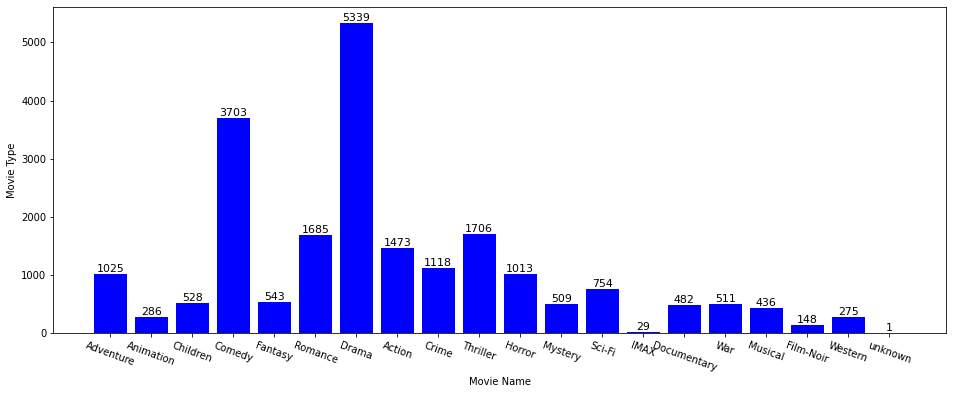

In [95]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=-20)
plt.xlabel("Movie Name")
plt.ylabel("Movie Type")
for a,b in zip(dicMovieType.keys(),dicMovieType.values()):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
plt.bar(dicMovieType.keys(), dicMovieType.values(),color='b')

根据图可以发现，这些电影所属的类型共有18种，其中Drama、Comedy类型的电影显著多余其它类型的电影；且最后出现了“no genres listed”，即出现某行数据，其电影分类信息缺失。

<BarContainer object of 9 artists>

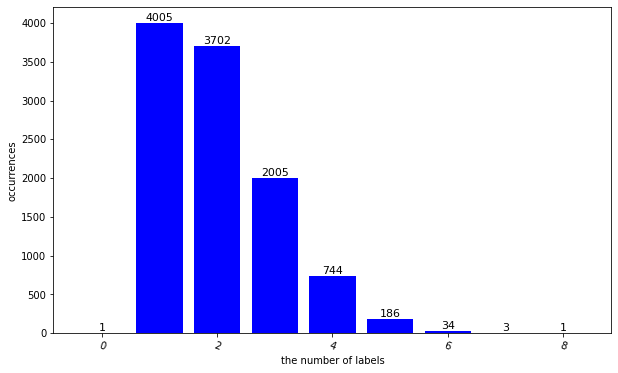

In [96]:
avgMovieType = {}
for line in content:
    lineSplit = line.split("::")
    movieTypes = lineSplit[2]
    movieTypeSingle = movieTypes.split("|")
    if len(movieTypeSingle) == 1 and movieTypeSingle[0] == "(no genres listed)\n":
        length = 0
    else:
        length = len(movieTypeSingle)
    if length in avgMovieType:
        avgMovieType[length] += 1
    else:
        avgMovieType[length] = 1


plt.figure(figsize=(10,6))
plt.xticks(rotation=-20)
plt.xlabel("the number of labels")
plt.ylabel("occurrences")
for a,b in zip(avgMovieType.keys(),avgMovieType.values()):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
plt.bar(avgMovieType.keys(), avgMovieType.values(),color='b')

绘制了电影标签数量和出现频率的柱状图后，可以发现大部分电影带有1-3个分类标签。其中，带有0个分类标签的值即为缺失了电影分类标签的数据。

##### 1.1.2 rating数据集
该数据集显示了用户对电影的评分形式。数据格式为UserID::MovieID::Rating::Timestamp，其评分以5分制进行，且以0.5分为最小增量单位。首先对rating数据集基本特征进行统计，时间戳暂且不做处理。

In [97]:
# 数据集：MovieLens 10M Dataset-movies.dat
with open(movieLenpath+"\\ratings.dat","r",encoding="utf-8") as f:
    content = f.readlines()
    scores = []
    dicMovieScore = {}
    for line in content:
        lineSplit = line.split("::")
        scores.append(round(float(lineSplit[2]),1))
        if int(lineSplit[1]) in dicMovieScore:
            dicMovieScore[int(lineSplit[1])].append(round(float(lineSplit[2]),1))
        else:
            dicMovieScore[int(lineSplit[1])] = [round(float(lineSplit[2]),1)]
print("数据行数：{}".format(len(content)))

数据行数：10000054


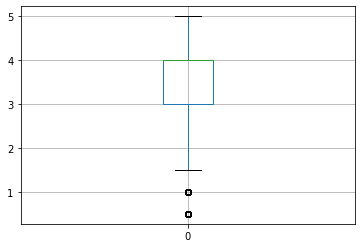

数据描述为：
                  0
count  1.000005e+07
mean   3.512422e+00
std    1.060418e+00
min    5.000000e-01
25%    3.000000e+00
50%    4.000000e+00
75%    4.000000e+00
max    5.000000e+00


In [98]:
data = np.array(scores)
df = pd.DataFrame(data)
df.boxplot()
plt.show()

print("数据描述为：")
print(df.describe())

可以发现，电影评分大部分集中在3-4分内，极端分数为0.5分和1分的记录。
接下来统计每部电影获得的评分个数和评分均值，这些数值能够反映该电影的大众度和口碑。

In [99]:
dicAvgMovie = {}
for movie in dicMovieScore.items():
    dicAvgMovie[movie[0]] = sum(movie[1])/len(movie[1])

有评分记录的电影共有:10677部


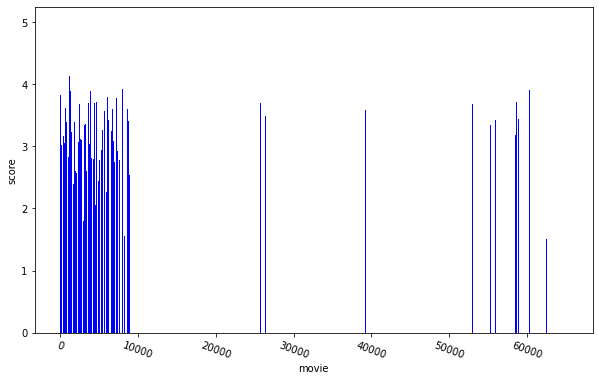

In [100]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=-20)
plt.xlabel("movie")
plt.ylabel("score")
# for a,b in zip(dicAvgMovie.keys(),dicAvgMovie.values()):
#     plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
plt.bar(dicAvgMovie.keys(), dicAvgMovie.values(),color='b')
print("有评分记录的电影共有:{}部".format(len(dicAvgMovie.keys())))

可以发现仅有10677部电影存在评分，总共含有10681部电影（其中有一部电影类型值缺失），即电影评分数据缺失值为4行，需要在后续步骤中对这两个数据集进行进一步处理。

In [101]:
missScoreMovie = []
for scoreMovie in dicMovieID.keys():
    if scoreMovie not in dicAvgMovie:
        missScoreMovie.append(scoreMovie)
print(f"缺失评价的电影编号为:{missScoreMovie}")

缺失评价的电影编号为:[25942, 60566, 62669, 64959]


##### 1.1.3 tags数据集
该数据集显示了用户对电影的简短评价（由文本构成），该评价含义仅用户自己知晓。数据格式为UserID::MovieID::Tag::Timestamp。统计每个属性的缺失值，发现无缺失。

In [102]:
with open(movieLenpath+"\\tags.dat","r",encoding="utf-8") as f:
    dataTag = []
    for line in f.readlines():
        line = line.strip("\n")
        dataTag.append(line.split("::"))
dataTagFrame = pd.DataFrame(dataTag)

In [103]:
print((dataTagFrame.isnull().sum()/dataTagFrame.shape[0]))

0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64


### 2 数据缺失值的处理
#### 2.1 数据缺失值
经过前面的分析可以发现：
① movies: 缺失一部电影的类型（虽然文本未缺失，但其类别内容含义为Unknown），判断其电影评分是否缺失，如果缺失，则做删除处理；如果并未缺失，可以不做处理。
② ratings: 包含了众多用户对电影的评分，缺失了对其中4部电影的评分。对于ratings的缺失值处理，采用推荐系统中的协同过滤算法补充缺失值。
首先对movies中类别为“(no genres listed)”的电影进行查找。

In [104]:
print(missDataMovie)

['8606::Pull My Daisy (1958)::(no genres listed)\n']


发现ID为8606的电影并未在缺失评分的名单上，因此对其不做处理。
接下来采用协同过滤的方法处理电影评分缺失值，处理对象为ID为25942，60566，62669，64959的电影。首先新建一个dataframe，它读入了rating.dat的内容，生成了名叫dataRateFrame的框架。

In [107]:
# with open(movieLenpath+"\\ratings.dat","r",encoding="utf-8") as f:
#     dataRate = []
dataRate = pd.read_csv(movieLenpath+"\\ratings.dat",sep="::",usecols=[0,1,2],
                       names = ["userId","itemId","rating"],
                       dtype = {"userId":"int64","itemId":"int64","rating":"float"},
                       encoding = "utf-8"
                       )
    # for line in f.readlines():
    #     line = line.strip("\n")
    #     lineSplit = line.split("::")
    #     dataRate.append([int(lineSplit[0]),int(lineSplit[1]),float(lineSplit[2])])

C:\Users\gui\AppData\Local\Temp\ipykernel_6356\3555625760.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dataRate = pd.read_csv(movieLenpath+"\\ratings.dat",sep="::",usecols=[0,1,2],


In [108]:
dataRateFrame = pd.DataFrame(dataRate,columns=["userId","itemId","rating"])

In [109]:
moviedf = pd.DataFrame(movieList,columns = ["id","fileName","fileType"])

首先查询id为25942的电影的信息，发现它是一个Drama类型的电影，于是寻找所有fileType中含有Drama的评分记录

In [110]:
print(moviedf[moviedf["id"] == "25942"])

         id                fileName fileType
8391  25942  Louisiana Story (1948)  [Drama]


In [111]:
print(moviedf[moviedf["id"] == "60566"])

          id                                           fileName  \
10360  60566  Just Another Love Story (Kærlighed på film) (2...   

                       fileType  
10360  [Crime, Drama, Thriller]  


In [112]:
print(moviedf[moviedf["id"] == "62669"])

          id                         fileName fileType
10510  62669  Black River (Kuroi kawa) (1957)  [Drama]


In [113]:
print(moviedf[moviedf["id"] == "64959"])

          id                                     fileName            fileType
10661  64959  Divide and Conquer (Why We Fight, 3) (1943)  [Documentary, War]


In [114]:
similarFilm = [[],[[],[]],[],[]]
for line in movieList:
    if "Crime" in line[2] and "Thriller" in line[2]:
        similarFilm[1][1].append(int(line[0]))
    elif "Crime" in line[2] and "Drama" in line[2]:
        similarFilm[1][1].append(int(line[0]))
    elif "Thriller" in line[2] and "Drama" in line[2]:
        similarFilm[1][1].append(int(line[0]))
    elif "Documentary" in line[2] and "War" in line[2]:
        similarFilm[3].append(int(line[0]))
    elif "Drama" in line[2]:
        similarFilm[0].append(int(line[0]))
        similarFilm[1][0].append(int(line[0]))
        similarFilm[2].append(int(line[0]))
    elif "Crime" in line[2] or "Thriller" in line[2]:
        similarFilm[1][0].append(int(line[0]))

In [115]:
print(similarFilm[1])

[[4, 10, 11, 14, 17, 21, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 40, 41, 43, 46, 49, 52, 53, 55, 57, 58, 59, 62, 63, 66, 67, 70, 72, 73, 74, 75, 76, 78, 80, 82, 83, 84, 85, 86, 89, 90, 94, 95, 96, 97, 98, 101, 103, 105, 106, 110, 112, 113, 114, 120, 121, 123, 124, 127, 130, 131, 132, 133, 138, 139, 140, 142, 143, 147, 148, 150, 151, 152, 153, 154, 155, 156, 163, 167, 168, 169, 171, 172, 173, 175, 178, 179, 182, 183, 184, 190, 191, 193, 194, 195, 197, 199, 200, 201, 202, 205, 207, 209, 211, 212, 213, 214, 215, 218, 219, 222, 224, 226, 227, 232, 233, 235, 240, 241, 242, 249, 253, 254, 257, 261, 262, 263, 264, 265, 266, 268, 269, 270, 271, 272, 273, 277, 279, 281, 282, 284, 285, 286, 297, 298, 299, 300, 301, 302, 304, 306, 307, 308, 309, 311, 314, 317, 318, 320, 321, 322, 324, 326, 328, 329, 330, 331, 334, 335, 336, 337, 338, 340, 341, 345, 346, 347, 349, 351, 354, 356, 358, 359, 361, 364, 365, 367, 369, 371, 372, 373, 375, 376, 377, 379, 380, 381, 385, 386, 388, 389, 395, 396, 399, 400, 

接下来分别找到对应的评分，查看它们的数据描述。
①对于单Drama类型的两部电影，25942和62669，采用众数mode=4.0分进行填充，对象为所有观看过drama类型的用户。
②对于复合类型的电影,发现存在既是Documentary，又是War类型的电影，因此对于缺失评分的64959号电影，采取同分类电影的众数值进行填充，评分对象为所有观看过同类型电影的人；
而对于60566号电影，没有相同分类的电影，但是有类似分类的电影,按照不同相似程度加权处理分数，如包含不同分类的电影，采用不同的众数值进行填充。
填补时时间戳指定为000000000，代表无含义

In [116]:
simDrama = dataRateFrame.loc[dataRateFrame["itemId"].isin(similarFilm[0])]
simDramaMode = simDrama["rating"].mode()

In [117]:
sim60566 = dataRateFrame.loc[dataRateFrame["itemId"].isin(similarFilm[1][0])]
sim60566Mode = simDrama["rating"].mode()
sim60566_2 = dataRateFrame.loc[dataRateFrame["itemId"].isin(similarFilm[1][1])]
sim60566Mode_2 = sim60566_2["rating"].mode()
sim64959 = dataRateFrame.loc[dataRateFrame["itemId"].isin(similarFilm[2])]
sim64959Mode = sim64959["rating"].mode()

In [127]:
with open(movieLenpath+"\\ratings_new.dat","a+",encoding="utf-8") as f:
    for id in similarFilm[0]:
        idString = "::".join([str(id),"25942",str(float(simDramaMode)),"000000000"])
        f.write(idString+"\n")
        idString = "::".join([str(id),"62669",str(float(simDramaMode)),"000000000"])
        f.write(idString+"\n")

    for id in similarFilm[1][0]:
        idString = "::".join([str(id),"60566",str(float(sim60566Mode)),"000000000"])
        f.write(idString+"\n")

    for id in similarFilm[1][1]:
        idString = "::".join([str(id),"60566",str(float(sim60566Mode_2)),"000000000"])
        f.write(idString+"\n")

    for id in similarFilm[3]:
        idString = "::".join([str(id),"64959",str(float(sim64959Mode)),"000000000"])
        f.write(idString+"\n")

### 3 数据集对比
#### 3.1 修改的数据集
仅修改了评分rating.dat，对其评分对象进行统计。

In [128]:
with open(movieLenpath+"\\ratings_new.dat","r",encoding="utf-8") as f:
    content = f.readlines()
    scores = []
    dicMovieScore = {}
    for line in content:
        lineSplit = line.split("::")
        scores.append(round(float(lineSplit[2]),1))
        if int(lineSplit[1]) in dicMovieScore:
            dicMovieScore[int(lineSplit[1])].append(round(float(lineSplit[2]),1))
        else:
            dicMovieScore[int(lineSplit[1])] = [round(float(lineSplit[2]),1)]
print("新数据行数：{}".format(len(content)))

新数据行数：10015008


In [129]:
dicAvgMovie = {}
for movie in dicMovieScore.items():
    dicAvgMovie[movie[0]] = sum(movie[1])/len(movie[1])

有评分记录的电影共有:10681部


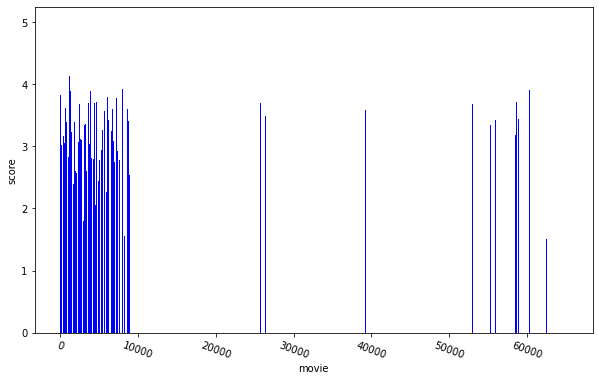

In [130]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=-20)
plt.xlabel("movie")
plt.ylabel("score")
# for a,b in zip(dicAvgMovie.keys(),dicAvgMovie.values()):
#     plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
plt.bar(dicAvgMovie.keys(), dicAvgMovie.values(),color='b')
print("有评分记录的电影共有:{}部".format(len(dicAvgMovie.keys())))

可以看到已经补完了缺失值。